In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [4]:
f = h5py.File('/home/syb/Code/coupling/matlab/file/sub/output/SDI_sub.mat') 
SDI = f['SDI_list'][:]

yeo_tran = pd.read_csv('/home/syb/Code/coupling/matlab/file/raw/yeo/subregion_func_network_Yeo.csv')


label = np.loadtxt('/home/syb/Code/coupling/python/file/data/SDI_sub/sc_mode_label.csv')


In [75]:
NameYeo7 = pd.read_excel('/home/syb/Code/coupling/matlab/file/raw/yeo/funcYeo.xlsx', 
                         sheet_name='Name_yeo7',header=1 ,index_col=0)

NameYeo17 = pd.read_excel('/home/syb/Code/coupling/matlab/file/raw/yeo/funcYeo.xlsx', 
                         sheet_name='Name_yeo17',header=1 ,index_col=0)

In [76]:
yeo_7 = np.zeros([3,793,7])
yeo_17 = np.zeros([3,793,17])

for roi_yeo in range(1,18):
    if roi_yeo < 8:
        index_7 = yeo_tran[yeo_tran['Yeo_7network'] == roi_yeo]['Label'].values
        a = np.mean(SDI[index_7,:,:],1)
        yeo_7[:,:,roi_yeo-1] = np.transpose(np.mean(SDI[index_7,:,:],0))
    index_17 = yeo_tran[yeo_tran['Yeo_17network'] == roi_yeo]['Label'].values
    yeo_17[:,:,roi_yeo-1] = np.transpose(np.mean(SDI[index_17,:,:],0))
    

In [83]:

FAYeo7 = yeo_7[0].flatten('F')
label_7 = []
yeo_name_7 = []
for i in range(7):
    label_7.extend(label)
    for j in range(793):
        yeo_name_7.append(NameYeo7.iloc[i,0])
df_7 = pd.DataFrame(FAYeo7,columns=['SDI'])
df_7.insert(loc =1 , column= 'yeo', value=yeo_name_7)
df_7.insert(loc =2 , column= 'group', value=label_7)


FAYeo17 = yeo_17[0].flatten('F')
label_17 = []
yeo_name_17 = []
for i in range(17):
    label_17.extend(label)
    for j in range(793):
        yeo_name_17.append(NameYeo17.iloc[i,0])
df_17 = pd.DataFrame(FAYeo17,columns=['SDI'])
df_17.insert(loc =1 , column= 'yeo', value=yeo_name_17)
df_17.insert(loc =2 , column= 'group', value=label_17)



(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Visual'),
  Text(1, 0, 'Somatomotor'),
  Text(2, 0, 'Dorsal Attention'),
  Text(3, 0, 'Ventral Attention'),
  Text(4, 0, 'Limbic'),
  Text(5, 0, 'Frontoparietal'),
  Text(6, 0, 'Default')])

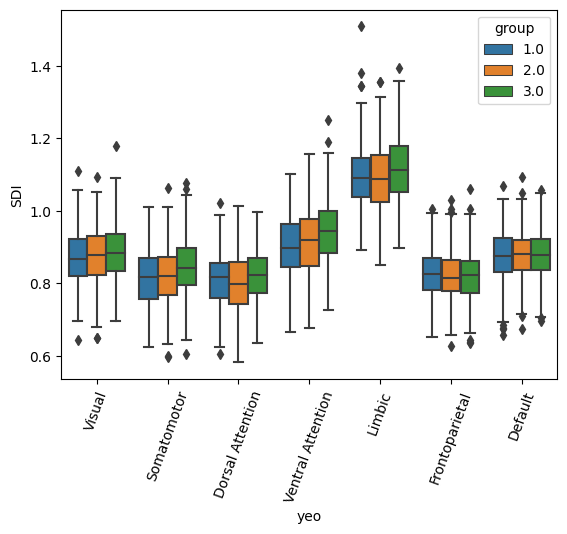

In [80]:
sns.boxplot(data=df_7,x = 'yeo',y='SDI',hue = 'group')

a = NameYeo7['Network name'].to_list()
plt.xticks(range(7), NameYeo7['Network name'].to_list())
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Visual peripheral'),
  Text(1, 0, 'Visual central'),
  Text(2, 0, 'Somato-motor A'),
  Text(3, 0, 'Somato-motor B'),
  Text(4, 0, 'Dorsal attention A'),
  Text(5, 0, 'Dorsal attention B'),
  Text(6, 0, 'Ventral attention '),
  Text(7, 0, 'Salience'),
  Text(8, 0, 'Limbic-1'),
  Text(9, 0, 'Limbic-2'),
  Text(10, 0, 'Control C'),
  Text(11, 0, 'Control A'),
  Text(12, 0, 'Control B'),
  Text(13, 0, 'Default D (Auditory)'),
  Text(14, 0, 'Default C'),
  Text(15, 0, 'Default A'),
  Text(16, 0, 'Default B')])

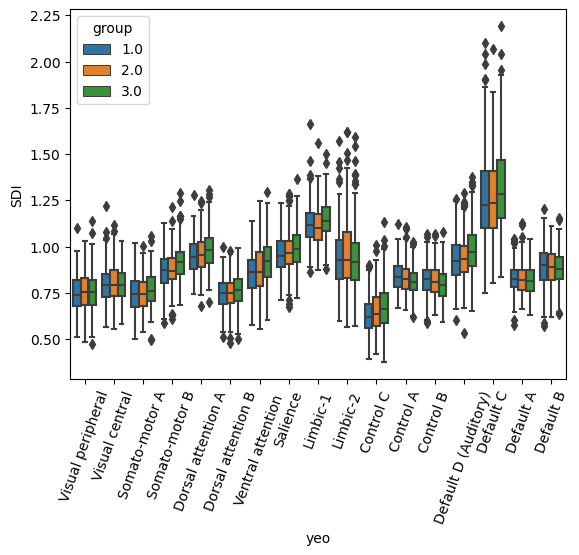

In [84]:
sns.boxplot(data=df_17,x = 'yeo',y='SDI',hue = 'group')

a = NameYeo17['Network name'].to_list()
plt.xticks(range(17), NameYeo17['Network name'].to_list())
plt.xticks(rotation=70)



<Axes: >

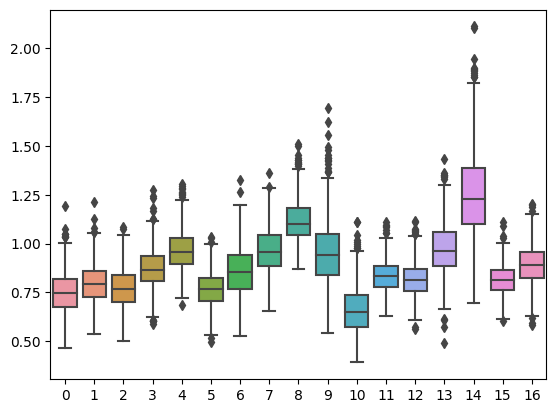

In [ ]:
sns.boxplot(data = yeo_17[1])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Visual'),
  Text(1, 0, 'Somatomotor'),
  Text(2, 0, 'Dorsal Attention'),
  Text(3, 0, 'Ventral Attention'),
  Text(4, 0, 'Limbic'),
  Text(5, 0, 'Frontoparietal'),
  Text(6, 0, 'Default')])

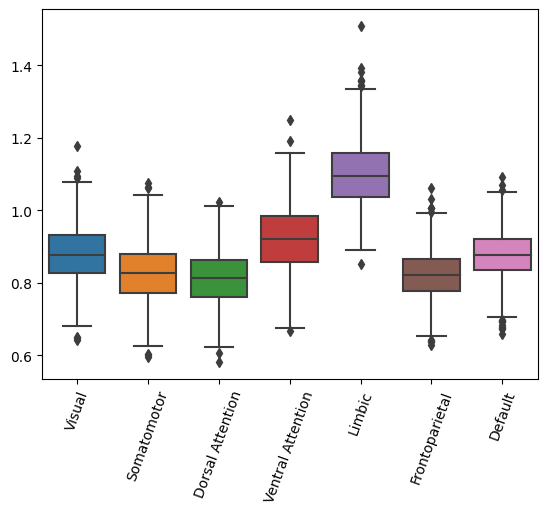

In [86]:
sns.boxplot(data = yeo_7[0])


plt.xticks(range(7), NameYeo7['Network name'].to_list())
plt.xticks(rotation=70)